In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [8]:
df.columns = [
    "State",
    "Date",
    "Frequency",
    "Estimated unemployment rate",
    "Estimated employed",
    "Estimated labour participation rate",
    "Region",
    "Longitude",
    "Latitude",
]

In [9]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.Date

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
262   2020-06-30
263   2020-07-31
264   2020-08-31
265   2020-09-30
266   2020-10-31
Name: Date, Length: 267, dtype: datetime64[ns]

In [10]:
df["Frequency"] = df["Frequency"].astype("category")
df["Region"] = df["Region"].astype("category")

In [11]:
# creating month column by extracting from Date
df["Month"] = df["Date"].dt.month
df["Month_int"] = df["Month"].apply(lambda x: int(x))
df["Month"]

0       1
1       2
2       3
3       4
4       5
       ..
262     6
263     7
264     8
265     9
266    10
Name: Month, Length: 267, dtype: int32

In [12]:
# creating month name column form Month column
df["Month_name"] = df["Month"].apply(lambda x: calendar.month_abbr[x])
df["Month_name"]

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
262    Jun
263    Jul
264    Aug
265    Sep
266    Oct
Name: Month_name, Length: 267, dtype: object

In [13]:
# deleting month
df.drop(columns="Month", inplace=True)
df.head()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [14]:
# to see the description of essential column
table_data = df[
    [
        "Estimated unemployment rate",
        "Estimated employed",
        "Estimated labour participation rate",
    ]
]
table_data.describe()

,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
count,267.000000,2.670000e+02,267.000000
mean,12.236929,1.396211e+07,41.681573
std,10.803283,1.336632e+07,7.845419
min,0.500000,1.175420e+05,16.770000
25%,4.845000,2.838930e+06,37.265000
50%,9.650000,9.732417e+06,40.390000
75%,16.755000,2.187869e+07,44.055000
max,75.850000,5.943376e+07,69.690000


In [16]:
#grouping unemployment rate, employed and labour participation rate for each region
regional_states = df.groupby(["Region"])[["Estimated unemployment rate",  "Estimated employed","Estimated labour participation rate"]].mean().reset_index()

import warnings
warnings.filterwarnings('ignore')
round(regional_states, 3)

,Region,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
0,East,13.916,1.960237e+07,40.109
1,North,15.890,1.307249e+07,38.703
2,Northeast,10.950,3.617106e+06,52.055
3,South,10.455,1.404059e+07,40.436
4,West,8.239,1.862351e+07,41.257


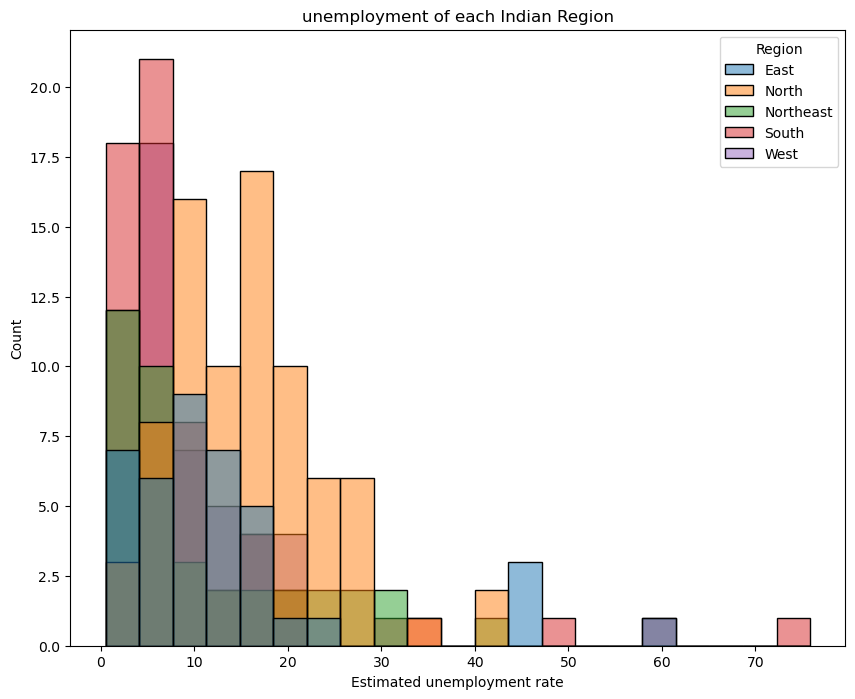

In [17]:
#The rate of unemployment by each regions
plt.figure(figsize=(10, 8))
plt.title("unemployment of each Indian Region")
sns.histplot(x="Estimated unemployment rate", hue="Region", data=df)
plt.show()

<Axes: xlabel='Estimated unemployment rate', ylabel='State'>

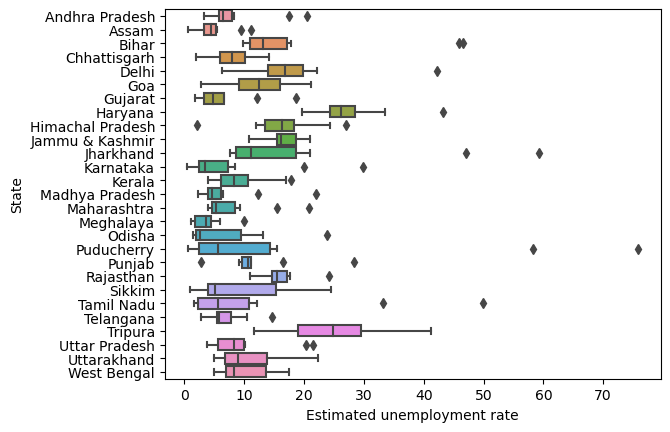